## Predicting Income Hackathon
# Modelling with Random Forest

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Read in Cleaned Data

In [27]:
df = pd.read_csv('./data/clean_df.csv')

In [29]:
len(df.columns.to_list())

82

In [21]:
# Check out Class Distribution
df.wage.value_counts()

0    24720
1     7841
Name: wage, dtype: int64

### Define Functions for Evaluating Model and Features

In [22]:
def print_metrics(the_gs):
    print(f' Best Score: {the_gs.best_score_}')
    print(f' Train Score: {the_gs.score(X_train, y_train)}')
    print(f' Test Score: {the_gs.score(X_val, y_val)}')
    print(f' Best Params: {the_gs.best_params_}')
    
def get_feature_importances(the_features, the_gs):
    feature_importances = the_gs.best_estimator_.feature_importances_
    feature_df = pd.DataFrame(data = feature_importances, index = the_features, columns = ['featureImportances'])
    return feature_df.sort_values(by='featureImportances', ascending=False)[:20]

### Create Feature Lists for use in Model Creation

In [41]:
collist = df.drop(columns=['wage', 'education']).columns.to_list() 
# 'education' dropped bc it's represented by a diff col
marital_cols = [col for col in collist if 'marital' in col]
country_cols = [col for col in collist if 'native' in col]
features_no_mar = [col for col in collist if 'marital' not in col]
features_no_country = [col for col in collist if 'native' not in col]
features_no_m_c = [col for col in features_no_mar if 'native' not in col]

In [66]:
print('length of collist: ', len(collist))
print('length of features no country: ',len(features_no_country))
print('length of features no country or marital status: ', len(features_no_m_c))

length of collist:  80
length of features no country:  39
length of features no country or marital status:  33


# Model 1 
### Using all features to start. Results in overfit model.

In [60]:
X = df[collist]
y = df['wage']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

In [61]:
rf1 = RandomForestClassifier(random_state=42)

rf1_params = {
    'n_estimators' : [100, 200],
    'max_depth' : [None, 1, 3, 5],
    'max_features' : [None, 2, 4],
    
}
rf1_gs = GridSearchCV(rf1, param_grid=rf1_params, cv=5)

In [62]:
rf1_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [63]:
print_metrics(rf1_gs)

 Best Score: 0.8522932022932023
 Train Score: 0.9999590499590499
 Test Score: 0.8593538877287803
 Best Params: {'max_depth': None, 'max_features': None, 'n_estimators': 200}


# Model 2
### Drop the Country features. No significant effect on model score but still overfit - continue to leave out counrty feature.

In [42]:
X = df[features_no_country]
y = df['wage']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

rf2 = RandomForestClassifier(random_state=42)
rf2_params = {
    'n_estimators' : [100, 200],
    'max_depth' : [None, 1, 3, 5],
    'max_features' : [None, 2, 4],
}
rf2_gs = GridSearchCV(rf2, param_grid=rf2_params, cv=5)

rf2_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [43]:
print_metrics(rf2_gs)

 Best Score: 0.8518427518427518
 Train Score: 0.9999590499590499
 Test Score: 0.8575113622405109
 Best Params: {'max_depth': None, 'max_features': None, 'n_estimators': 200}


In [44]:
get_feature_importances(features_no_country, rf2_gs)

,featureImportances
marital_status_married-civ-spouse,0.196199
fnlwgt,0.190307
capital_gains_net,0.143036
education_num,0.128767
age,0.122212
hours_per_week,0.070191
occupation_exec-managerial,0.011614
workclass_private,0.011299
workclass_self-emp-not-inc,0.009813
occupation_prof-specialty,0.008878


# Model 3
### Leave out country and marital status. Also no real effect on score but still overfit. Continue leaving out country and marital status.

In [46]:
X = df[features_no_m_c]
y = df['wage'] #enter the column for wage > or < $50k

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

rf3 = RandomForestClassifier(random_state=42)
rf3_params = {
    'n_estimators' : [100, 200],
    'max_depth' : [None, 1, 3, 5],
    'max_features' : [None, 2, 4],
}
rf3_gs = GridSearchCV(rf3, param_grid=rf3_params, cv=5)

rf3_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [47]:
print_metrics(rf3_gs)

 Best Score: 0.8525389025389025
 Train Score: 0.9999590499590499
 Test Score: 0.8548089915243827
 Best Params: {'max_depth': None, 'max_features': None, 'n_estimators': 200}


In [48]:
get_feature_importances(features_no_m_c, rf3_gs)

,featureImportances
capital_gains_net,0.198019
fnlwgt,0.194715
age,0.143845
education_num,0.118121
hours_per_week,0.070592
relationship_not-in-family,0.051225
relationship_own-child,0.035544
relationship_unmarried,0.033958
occupation_exec-managerial,0.012354
workclass_private,0.011629


# Model 4
### Tuning model, increasing min_samples_leaf and got a less overfit model and increased score.

In [49]:
X = df[features_no_m_c]
y = df['wage'] #enter the column for wage > or < $50k

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

rf4 = RandomForestClassifier(random_state=42)
rf4_params = {
    'n_estimators' : [200],
    'min_samples_split' : [2, 5] ,
    'max_depth' : [None],
    'max_features' : [4],
    'min_samples_leaf' : [3, 5],
    'class_weight': [None, 'balanced', {1:.75, 0:.25}]
}
rf4_gs = GridSearchCV(rf4, param_grid=rf4_params, cv=3)

rf4_gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [50]:
print_metrics(rf4_gs)

 Best Score: 0.8588861588861589
 Train Score: 0.9002457002457003
 Test Score: 0.866601154649306
 Best Params: {'class_weight': None, 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}


In [51]:
get_feature_importances(features_no_m_c, rf4_gs)

,featureImportances
capital_gains_net,0.194396
age,0.148282
education_num,0.144921
hours_per_week,0.080782
fnlwgt,0.073421
relationship_not-in-family,0.068033
sex_male,0.044047
relationship_own-child,0.041568
occupation_exec-managerial,0.034483
relationship_unmarried,0.027516


# Model 5
### Pared down gridsearch, added back in marital status feature. Increased score, no major increase in variance

In [52]:
X = df[features_no_country]
y = df['wage'] #enter the column for wage > or < $50k

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

rf5 = RandomForestClassifier(random_state=42)
rf5_params = {
    'n_estimators' : [200],
    'min_samples_split' : [2, 5] ,
    'max_depth' : [None],
    'max_features' : ['auto', 4],
    'min_samples_leaf' : [3, 5]
}
rf5_gs = GridSearchCV(rf5, param_grid=rf5_params, cv=3)

rf5_gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [53]:
print_metrics(rf5_gs)

 Best Score: 0.8612612612612612
 Train Score: 0.9036036036036036
 Test Score: 0.8673381648446137
 Best Params: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}


In [54]:
len(features_no_country)

39

In [55]:
get_feature_importances(features_no_country, rf5_gs)

,featureImportances
capital_gains_net,0.186180
marital_status_married-civ-spouse,0.153511
education_num,0.144374
age,0.112195
fnlwgt,0.071562
hours_per_week,0.063563
marital_status_never-married,0.049791
occupation_exec-managerial,0.029730
occupation_prof-specialty,0.026572
relationship_not-in-family,0.024217


# Final Model (6)! 
### Just use the top 15 features from the previous model. Slight reduction in score but simpler model.

In [56]:
final_features = get_feature_importances(features_no_country, rf5_gs)[:15].index.to_list()
final_features

['capital_gains_net',
 'marital_status_married-civ-spouse',
 'education_num',
 'age',
 'fnlwgt',
 'hours_per_week',
 'marital_status_never-married',
 'occupation_exec-managerial',
 'occupation_prof-specialty',
 'relationship_not-in-family',
 'sex_male',
 'relationship_own-child',
 'relationship_unmarried',
 'relationship_wife',
 'occupation_other-service']

In [80]:
X = df[final_features]
y = df['wage'] #enter the column for wage > or < $50k

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

rf6 = RandomForestClassifier(random_state=42)
rf6_params = {
    'n_estimators' : [200],
    'min_samples_split' : [2, 5] ,
    'max_depth' : [None],
    'max_features' : [4],
    'min_samples_leaf' : [3, 5],
    'class_weight': [None, 'balanced', {1:.75, 0:.25}]
}
rf6_gs = GridSearchCV(rf6, param_grid=rf6_params, cv=3)

rf6_gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [81]:
print_metrics(rf6_gs)

 Best Score: 0.8585176085176085
 Train Score: 0.8896805896805897
 Test Score: 0.8578798673381648
 Best Params: {'class_weight': None, 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [82]:
get_feature_importances(final_features, rf6_gs)

,featureImportances
capital_gains_net,0.217617
marital_status_married-civ-spouse,0.200639
education_num,0.169057
age,0.104296
fnlwgt,0.073497
hours_per_week,0.067050
marital_status_never-married,0.052443
occupation_exec-managerial,0.028783
occupation_prof-specialty,0.022263
relationship_not-in-family,0.016908


In [83]:
X_val.shape
len(final_features)

15

# Metrics

### Confusion Matrix

In [84]:
from sklearn.metrics import confusion_matrix
preds = rf6_gs.predict(X_val)
cm = confusion_matrix(y_val, preds)
tn, fp, fn, tp = cm.ravel()
spec = tn/(tn+fp)
sens = tp/(tp+fn)

print(f"""TN: {tn}
FP:{fp} 
FN:{fn}
TP:{tp}""")
print(f'Specificity: {round(spec,2)}')
print(f'Sensitivity: {round(sens,2)}')
cm

TN: 5791
FP:390 
FN:767
TP:1193
Specificity: 0.94
Sensitivity: 0.61


array([[5791,  390],
       [ 767, 1193]])

### Charts

In [117]:
rf6_gs.predict_proba(X_val)

array([[0.88906978, 0.11093022],
       [0.61795052, 0.38204948],
       [0.99726099, 0.00273901],
       ...,
       [0.75153274, 0.24846726],
       [0.44184554, 0.55815446],
       [0.60950989, 0.39049011]])

In [118]:
pred_proba = rf6_gs.predict_proba(X_val)
pred_proba = [i[1] for i in rf6_gs.predict_proba(X_val)]
pred_df = pd.DataFrame({'true_values': y_val,
                        'pred_probs':pred_proba,
                        })
pred_df

,true_values,pred_probs
21921,0,0.110930
7205,0,0.382049
22493,0,0.002739
14122,0,0.043843
8698,0,0.059803
...,...,...
22271,1,0.204901
5245,0,0.011388
25208,0,0.248467
14921,0,0.558154


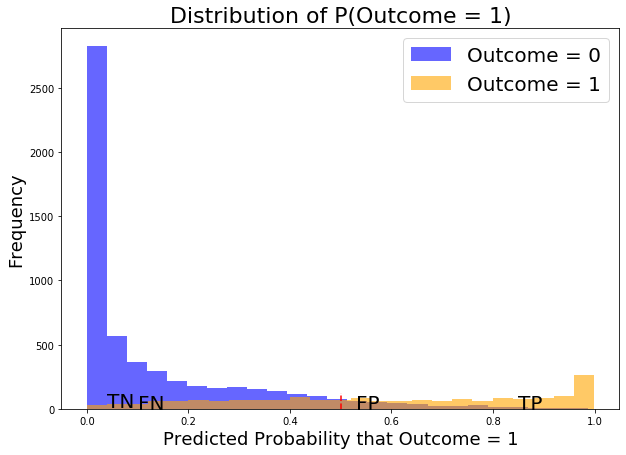

In [119]:
# Create figure.
plt.figure(figsize = (10,7))
# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Outcome = 1')
# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 120,
           color = 'r',
           linestyle = '--')
# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.04, 15),
             s = 'TN',
             size = 20)
plt.annotate(xy = (0.1, 0),
             s = 'FN',
             size = 20)
plt.annotate(xy = (0.85, 1),
             s = 'TP',
             size = 20)
plt.annotate(xy = (0.53, 1),
             s = 'FP',
             size = 20)
# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)
# Create legend.
plt.legend(fontsize = 20);

In [128]:
final_model = rf6_gs

In [148]:
df_test = pd.read_csv('clean_test.csv')

# Get rid of country columns and education after all - model better without
df_test.drop(columns=country_cols, inplace=True)
df_test.drop(columns=['education'], inplace=True)

X = df_test[final_features]
len(final_features)

15

In [149]:
df_test.head()

,age,fnlwgt,education_num,hours_per_week,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_state-gov,...,occupation_other-service,occupation_priv-house-serv,occupation_prof-specialty,occupation_protective-serv,occupation_sales,occupation_tech-support,occupation_transport-moving,occupation_other-service.1,sex_male,capital_gains_net
0,25,226802,8,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,38,89814,9,50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,28,336951,12,40,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,44,160323,10,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,7688
4,18,103497,10,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [150]:
df_test['wage'] = final_model.predict_proba(X)[:, 1]

In [151]:
df_wage_preds = pd.DataFrame({'wage':df_test['wage']})

In [152]:
df_wage_preds

,wage
0,0.000123
1,0.381617
2,0.415808
3,0.997058
4,0.000000
...,...
16276,0.067537
16277,0.092888
16278,0.777688
16279,0.343659


In [153]:
df_wage_preds.to_csv('final_predictions.csv')

In [154]:
df_wage_preds.shape

(16281, 1)